In [100]:
import numpy as np
import math
from matplotlib import pyplot as plt
from random import randrange

In [101]:
clusters = 3 
mu_1 = np.array([1,0])
mu_2 = np.array([-1,0])
mu_3 = np.array([0,-10])
mu = [mu_1,mu_2,mu_3]

a = 1/math.sqrt(2)

U = np.matrix([[a,-a],[a,a]])
UT = U.T

lambda_1 = np.matrix([[4,0],[0,1]])
lambda_2 = np.matrix([[1,0],[0,5]])
lambda_3 = np.identity(2)
lamb = [lambda_1,lambda_2,lambda_3]

In [102]:
cov_1 = np.matmul(np.matmul(U,lambda_1),UT)
cov_2 = np.matmul(np.matmul(U,lambda_2),UT)
cov_3 = np.matmul(np.matmul(U,lambda_3),UT)

cov = [cov_1,cov_2,cov_3]

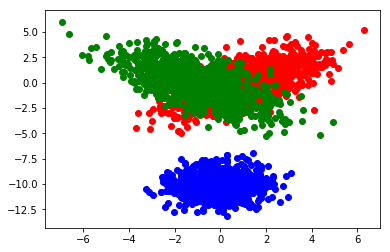

In [103]:
fig, ax = plt.subplots()
clusterData = []
color = ['r','g','b']
for i in range(clusters):
    x, y = np.random.multivariate_normal(mu[i], cov[i], 1000).T
    clusterData.extend(np.array([x,y]).T.tolist())
    ax.scatter(x,y, c=color[i])
    
clusterData = np.asarray(clusterData)
np.random.shuffle(clusterData)

In [104]:
#Randomly Assign Centroids
#Number of clusters
clusters = 3
# X coordinates of random centroids
Cx = np.random.randint(-8,6, size=clusters)
# Y coordinates of random centroids
Cy = np.random.randint(-12.5,5, size=clusters)
centroids = np.array(list(zip(Cx, Cy)), dtype=np.float32)    

#Cluster Assignments
assignedCluster = np.zeros(len(clusterData))

In [105]:
# Compute Distance
def Euclidean(xi, centroid):
    return np.linalg.norm(xi-centroid,2)

In [106]:
#Store Centroids and take initial error
C_update = np.zeros(centroids.shape)
dist = Euclidean(centroids,C_update)

In [107]:
while dist !=0:
    for i in range(len(clusterData)):
        distances = np.zeros(3)
        distances[0] = Euclidean(clusterData[i],centroids[0])
        distances[1] = Euclidean(clusterData[i],centroids[1])
        distances[2] = Euclidean(clusterData[i],centroids[2])
        cluster = np.argmin(distances)
        assignedCluster[i] = cluster
    C_update = centroids

    #Finding the new centroids by taking the average value
    for i in range(clusters):
        C_update = centroids
        xi = [clusterData[j] for j in range(len(clusterData)) if assignedCluster[j] == i]
        centroids[i] = np.mean(xi, axis=0)
        
    dist = Euclidean(centroids, C_update)

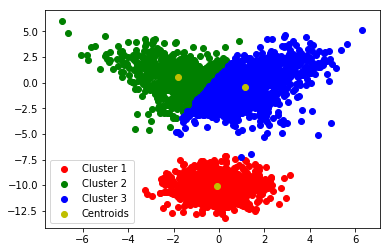

In [108]:
clusterLabels = ['Cluster 1','Cluster 2','Cluster 3']
for i in range(clusters):
        xi = np.array([clusterData[j] for j in range(len(clusterData)) if assignedCluster[j] == i])
        plt.scatter(xi[:, 0], xi[:, 1], c=color[i],label = clusterLabels[i])
plt.scatter(centroids[:, 0], centroids[:, 1],c='y',marker='o',label='Centroids')
plt.legend()